<a href="https://colab.research.google.com/github/GlebSimon/Gleb/blob/main/Strata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Assignment**


Please complete the following tasks.

1)Build up distribution of orders according to reasons for failure: cancellations before and after driver assignment, and reasons for order rejection. Analyse the resulting plot. Which category has the highest number of orders?

2)Plot the distribution of failed orders by hours. Is there a trend that certain hours have an abnormally high proportion of one category or another? What hours are the biggest fails? How can this be explained?

3)Plot the average time to cancellation with and without driver, by the hour. If there are any outliers in the data, it would be better to remove them. Can we draw any conclusions from this plot?

4)Plot the distribution of average ETA by hours. How can this plot be explained?

In [121]:
#We will use the Pandas and Numpy library to load the CSVs into a DataFrame structure.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('dark_background')

In [122]:
from google.colab import files

uploaded = files.upload()


Saving data_orders.csv to data_orders (1).csv


In [123]:
import pandas as pd
orders = pd.read_csv('data_orders.csv', header=0)


In [124]:
orders.head()

,order_datetime,origin_longitude,origin_latitude,m_order_eta,order_gk,order_status_key,is_driver_assigned_key,cancellations_time_in_seconds
0,18:08:07,-0.978916,51.456173,60.0,3000583041974,4,1,198.0
1,20:57:32,-0.950385,51.456843,NaN,3000583116437,4,0,128.0
2,12:07:50,-0.969520,51.455544,477.0,3000582891479,4,1,46.0
3,13:50:20,-1.054671,51.460544,658.0,3000582941169,4,1,62.0
4,21:24:45,-0.967605,51.458236,NaN,3000583140877,9,0,NaN


In [125]:
orders.shape

(10716, 8)

In [126]:
orders.groupby(['order_status_key','is_driver_assigned_key']).agg({'order_gk':'count'})

order_gk
order_status_key is_driver_assigned_key          
4                0                           4496
                 1                           2811
9                0                           3406
                 1                              3

In [127]:
uploaded = files.upload()


Saving data_orders.csv to data_orders (2).csv


In [128]:
offers = pd.read_csv('data_offers.csv', header=0)


In [129]:
offers.sample(10)

,order_gk,offer_id
313501,3000627332948,300052070820
23252,3000554395972,300050669679
121762,3000558036238,300050795437
134671,3000625816978,300052007609
308860,3000632322098,300052373194
217583,3000595546437,300051535614
44301,3000599710779,300051670310
232220,3000557786324,300050779693
182367,3000630757407,300052317443
94014,3000593646271,300051431914


In [130]:
df = orders.merge(offers, how='inner', on='order_gk')

In [131]:
df.sample(10)

,order_datetime,origin_longitude,origin_latitude,m_order_eta,order_gk,order_status_key,is_driver_assigned_key,cancellations_time_in_seconds,offer_id
11947,15:17:32,-0.970250,51.454985,176.0,3000598587301,4,1,239.0,300051616583
7316,23:29:39,-0.947629,51.444201,NaN,3000590131172,4,0,82.0,300051312068
916,13:04:17,-0.963172,51.454195,NaN,3000627906660,4,0,22.0,300052111622
27196,07:32:27,-0.955580,51.453493,1078.0,3000622140805,4,1,1017.0,300051751865
15995,07:46:36,-0.982094,51.449709,959.0,3000557111199,4,1,91.0,300050752686
3006,12:14:06,-0.946060,51.441141,NaN,3000623541913,4,0,107.0,300051851911
7403,13:22:53,-0.976396,51.456537,NaN,3000589857365,4,0,87.0,300051294326
21113,02:43:51,-0.945581,51.451073,NaN,3000590905695,9,0,NaN,300051339524
16769,23:04:57,-0.942800,51.440426,NaN,3000627507424,9,0,NaN,300052091247
16323,23:16:27,-0.956564,51.443369,NaN,3000623818210,4,0,151.0,300051875812


In [132]:
df["is_driver_assigned"] = np.where(df["is_driver_assigned_key"] == 1, "Yes", "No")
df["order_status"] = np.where(df["order_status_key"] == 4, "Client Cancelled", "System Reject")

df.drop(columns=["is_driver_assigned_key", "order_status_key"], inplace=True)

In [133]:
df = df.rename(columns={'order_datetime':'order_time'})

In [134]:
df.head()

,order_time,origin_longitude,origin_latitude,m_order_eta,order_gk,cancellations_time_in_seconds,offer_id,is_driver_assigned,order_status
0,18:08:07,-0.978916,51.456173,60.0,3000583041974,198.0,300050983403,Yes,Client Cancelled
1,20:57:32,-0.950385,51.456843,NaN,3000583116437,128.0,300050986179,No,Client Cancelled
2,20:57:32,-0.950385,51.456843,NaN,3000583116437,128.0,300050986174,No,Client Cancelled
3,20:57:32,-0.950385,51.456843,NaN,3000583116437,128.0,300050986180,No,Client Cancelled
4,12:07:50,-0.969520,51.455544,477.0,3000582891479,46.0,300050976275,Yes,Client Cancelled


**Question 1**


Build up a distribution of orders according to reasons for failure: cancellations before and after driver assignment, and reasons for order rejection. Analyse the resulting plot. Which category has the highest number of orders?



In [135]:
df.groupby(['is_driver_assigned','order_status'])['order_gk'].count()

is_driver_assigned  order_status    
No                  Client Cancelled    13435
                    System Reject        9469
Yes                 Client Cancelled     8360
                    System Reject           4
Name: order_gk, dtype: int64

In [136]:
df.groupby(['is_driver_assigned','order_status']).agg({'order_gk':'count'})

order_gk
is_driver_assigned order_status              
No                 Client Cancelled     13435
                   System Reject         9469
Yes                Client Cancelled      8360
                   System Reject            4

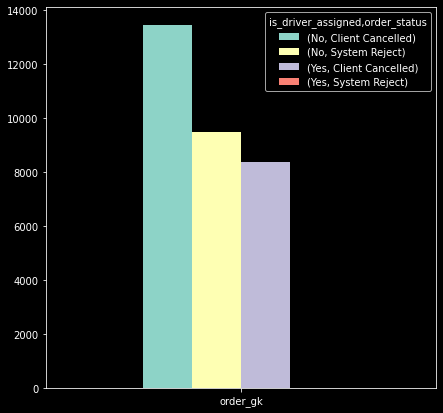

In [137]:
df_q1 = df.pivot_table(columns=["is_driver_assigned", "order_status"], values="order_gk", aggfunc="count")
_ = df_q1.plot(kind="bar", subplots=False, figsize=(7, 7), legend=True, rot=0)

**Question 2**


Plot the distribution of failed orders by hours. Is there a trend that certain hours have an abnormally high proportion of one category or another? What hours are the biggest fails? How can this be explained?

In [138]:
#df['hour'] =df['order_time'].dt.hour

In [139]:
df['order_time'] = pd.to_datetime(df['order_time'], format = '%H:%M:%S')

In [140]:
df['hour'] = df['order_time'].dt.hour

In [141]:
df.sample(5)

,order_time,origin_longitude,origin_latitude,m_order_eta,order_gk,cancellations_time_in_seconds,offer_id,is_driver_assigned,order_status,hour
27628,1900-01-01 08:57:48,-0.955672,51.453561,838.0,3000629108208,88.0,300052202233,Yes,Client Cancelled,8
14037,1900-01-01 01:43:37,-0.971391,51.473309,NaN,3000585890777,32.0,300051132929,No,Client Cancelled,1
11659,1900-01-01 08:46:55,-0.987690,51.451362,NaN,3000624767808,29.0,300051931053,No,Client Cancelled,8
20589,1900-01-01 08:49:26,-0.956191,51.453381,NaN,3000628457202,160.0,300052142373,No,Client Cancelled,8
9115,1900-01-01 08:26:57,-0.940241,51.421509,NaN,3000624765944,160.0,300051928283,No,Client Cancelled,8


In [142]:
df.groupby(['hour','order_status']).agg({'order_gk':'count'})

order_gk
hour order_status              
0    Client Cancelled      1283
     System Reject          710
1    Client Cancelled       931
     System Reject          374
2    Client Cancelled       826
     System Reject          649
3    Client Cancelled       760
     System Reject          658
4    Client Cancelled       182
     System Reject           45
5    Client Cancelled        78
     System Reject           33
6    Client Cancelled       283
     System Reject          109
7    Client Cancelled      1040
     System Reject          526
8    Client Cancelled      2527
     System Reject         1338
9    Client Cancelled       964
     System Reject          294
10   Client Cancelled       350
     System Reject           37
11   Client Cancelled       445
     System Reject           65
12   Client Cancelled       606
     System Reject           91
13   Client Cancelled       778
     System Reject          294
14   Client Cancelled       608
     System Reject          125
15   Client Cancelled      1109
     System Reject          335
16   Client Cancelled       720
     System Reject          112
17   Client Cancelled      1221
     System Reject          319
18   Client Cancelled       822
     System Reject          314
19   Client Cancelled       549
     System Reject           95
20   Client Cancelled      1010
     System Reject          371
21   Client Cancelled      1746
     System Reject         1036
22   Client Cancelled      1369
     System Reject          660
23   Client Cancelled      1588
     System Reject          883

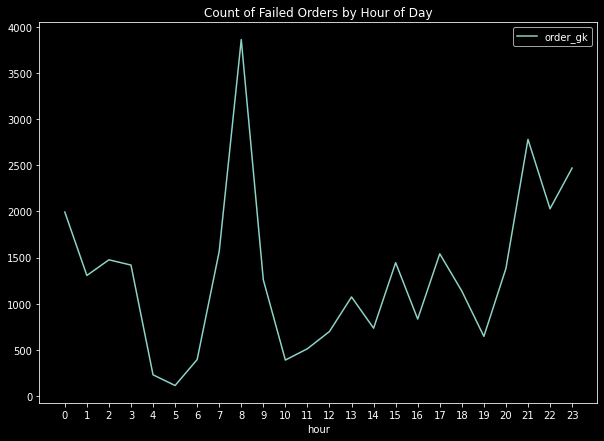

In [143]:
df.groupby('hour').agg({'order_gk':'count'}).plot(xticks=range(0,24), legend =True, 
                                                  figsize=(10,7), 
                                                  title="Count of Failed Orders by Hour of Day");

In [144]:
group2 = df.groupby(['hour','is_driver_assigned','order_status']).agg({'order_gk':'count'})

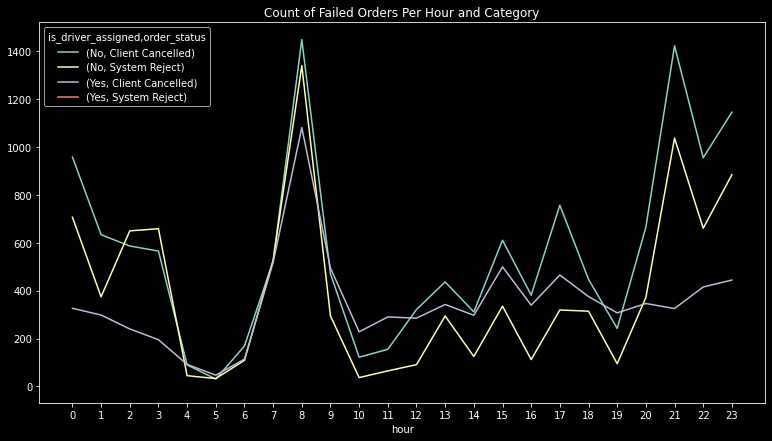

In [145]:
group2.reset_index().pivot(index="hour",
                                   columns=["is_driver_assigned", "order_status"],
                                   values="order_gk").plot(xticks=range(0, 24),
                                                           figsize=(13, 7),
                                                           title="Count of Failed Orders Per Hour and Category");

**Question 3**


Plot the average time to cancellation with and without driver, by hour. Can we draw any conclusions from this plot?

In [146]:
df.head()

,order_time,origin_longitude,origin_latitude,m_order_eta,order_gk,cancellations_time_in_seconds,offer_id,is_driver_assigned,order_status,hour
0,1900-01-01 18:08:07,-0.978916,51.456173,60.0,3000583041974,198.0,300050983403,Yes,Client Cancelled,18
1,1900-01-01 20:57:32,-0.950385,51.456843,NaN,3000583116437,128.0,300050986179,No,Client Cancelled,20
2,1900-01-01 20:57:32,-0.950385,51.456843,NaN,3000583116437,128.0,300050986174,No,Client Cancelled,20
3,1900-01-01 20:57:32,-0.950385,51.456843,NaN,3000583116437,128.0,300050986180,No,Client Cancelled,20
4,1900-01-01 12:07:50,-0.969520,51.455544,477.0,3000582891479,46.0,300050976275,Yes,Client Cancelled,12


In [147]:
avg_cancell_time = df.groupby(['hour','is_driver_assigned']).agg({'cancellations_time_in_seconds':'mean'})

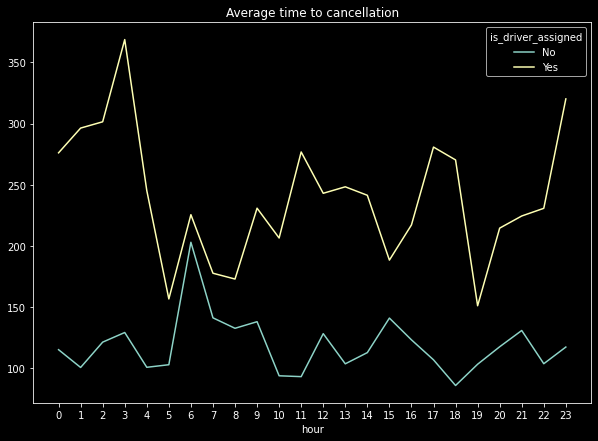

In [148]:
avg_cancell_time.pivot_table(index='hour', values='cancellations_time_in_seconds', columns='is_driver_assigned', aggfunc='mean') \
                                                                                  .plot(xticks = range(0,24),figsize =(10,7),
                                                                                        title='Average time to cancellation')
                                                                                  

As we can see the average time to cancellation the order in cases where the driver is assigned higher than when the driver is not assigned. And that's true for each hour.

**Question 4**


Plot the distribution of average ETA by hours. How can this plot be explained?

In [149]:
df.sample(10)

,order_time,origin_longitude,origin_latitude,m_order_eta,order_gk,cancellations_time_in_seconds,offer_id,is_driver_assigned,order_status,hour
20537,1900-01-01 17:53:35,-0.943463,51.442078,NaN,3000628681794,862.0,300052172218,No,Client Cancelled,17
18046,1900-01-01 07:52:09,-0.992317,51.441893,NaN,3000622791969,181.0,300051785406,No,Client Cancelled,7
12752,1900-01-01 22:56:02,-0.996844,51.452558,NaN,3000628807174,NaN,300052187672,No,System Reject,22
5034,1900-01-01 23:40:29,-0.947175,51.444305,NaN,3000594471489,130.0,300051486522,No,Client Cancelled,23
14615,1900-01-01 20:18:25,-0.958256,51.430795,594.0,3000626341829,35.0,300052028524,Yes,Client Cancelled,20
10415,1900-01-01 06:59:42,-0.931454,51.452609,NaN,3000587755887,1179.0,300051177235,No,Client Cancelled,6
26845,1900-01-01 07:02:53,-0.969568,51.451614,NaN,3000622116186,64.0,300051751037,No,Client Cancelled,7
17046,1900-01-01 02:07:51,-0.947587,51.445231,NaN,3000626980446,640.0,300052031372,No,Client Cancelled,2
22558,1900-01-01 22:34:06,-0.968669,51.453767,NaN,3000579476173,43.0,300050930874,No,Client Cancelled,22
8715,1900-01-01 23:20:12,-0.966745,51.453236,NaN,3000590107548,155.0,300051311727,No,Client Cancelled,23


In [150]:
df['m_order_eta'].sort_values(ascending=False).value_counts(normalize=True)

60.0     0.064323
478.0    0.043161
238.0    0.038259
298.0    0.038259
178.0    0.036227
           ...   
526.0    0.000120
698.0    0.000120
411.0    0.000120
549.0    0.000120
378.0    0.000120
Name: m_order_eta, Length: 235, dtype: float64

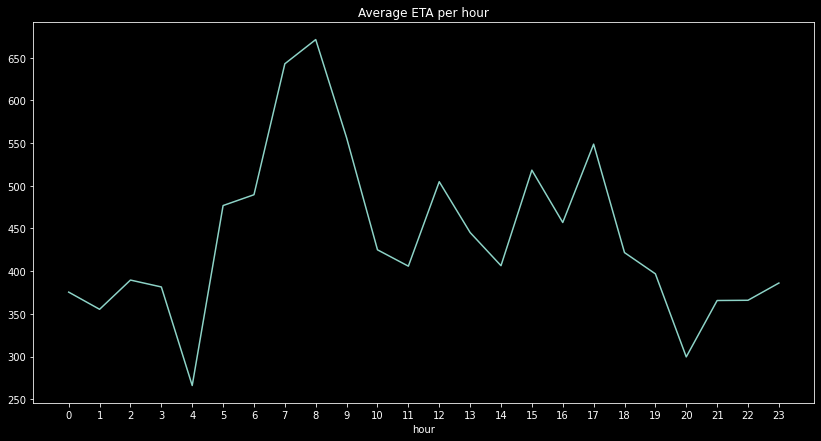

In [151]:
avg_eta_hour = df.groupby(by="hour")["m_order_eta"].mean().plot(figsize=(14, 7),
                                                           xticks=range(0, 24),
                                                           title="Average ETA per hour")